## 11.6. 动量法

#### 11.6.1.2. 条件不佳的问题

epoch 20, x1: -0.943467, x2: -0.000073


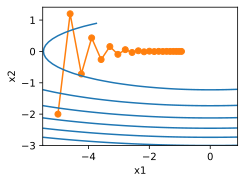

In [1]:
%matplotlib inline
import mindspore
from d2l import mindspore as d2l

eta = 0.4
def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2
def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1: -0.387814, x2: -1673.365109


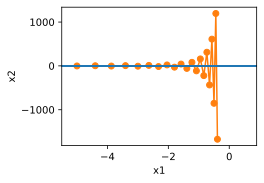

In [2]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

#### 11.6.1.3. 动量法

epoch 20, x1: 0.007188, x2: 0.002553


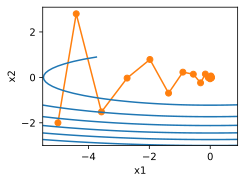

In [3]:
def momentum_2d(x1, x2, v1, v2):
    v1 = beta * v1 + 0.2 * x1
    v2 = beta * v2 + 4 * x2
    return x1 - eta * v1, x2 - eta * v2, v1, v2

eta, beta = 0.6, 0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

epoch 20, x1: -0.126340, x2: -0.186632


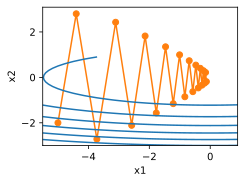

In [4]:
eta, beta = 0.6, 0.25
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

#### 11.6.1.4. 有效样本权重

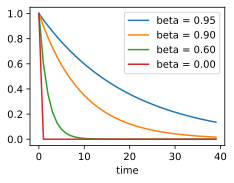

In [5]:
d2l.set_figsize()
betas = [0.95, 0.9, 0.6, 0]
for beta in betas:
    x = d2l.arange(40).asnumpy()
    d2l.plt.plot(x, beta ** x, label=f'beta = {beta:.2f}')
d2l.plt.xlabel('time')
d2l.plt.legend();

### 11.6.2. 实际实验

#### 11.6.2.1. 从零开始实现

In [6]:
def init_momentum_states(feature_dim):
    v_w = d2l.zeros((feature_dim, 1))
    v_b = d2l.zeros(1)
    return (v_w, v_b)
    
def sgd_momentum(params, grads, states, hyperparams):
    for p, v, g in zip(params, states, grads):
        v[:] = hyperparams['momentum'] * v + g
        p[:] -= hyperparams['lr'] * v

loss: 0.244, 0.413 sec/epoch


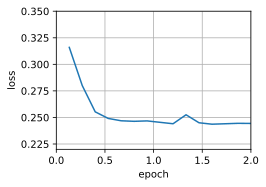

In [7]:
def train_momentum(lr, momentum, num_epochs=2):
    d2l.train_ch11(sgd_momentum, init_momentum_states(feature_dim),
                   {'lr': lr, 'momentum': momentum}, data_iter,
                   feature_dim, num_epochs)

data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
train_momentum(0.02, 0.5)

loss: 0.250, 0.413 sec/epoch


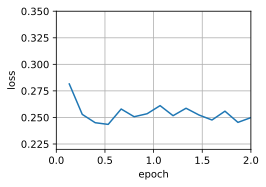

In [8]:
train_momentum(0.01, 0.9)

loss: 0.243, 0.382 sec/epoch


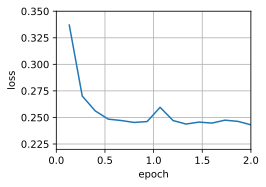

In [9]:
train_momentum(0.005, 0.9)

#### 11.6.2.2. 简洁实现

loss: 0.247, 0.076 sec/epoch


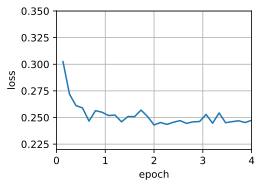

In [10]:
trainer = mindspore.nn.SGD
d2l.train_concise_ch11(trainer, {'learning_rate': 0.005, 'momentum': 0.9}, data_iter)

#### 11.6.3.2. 标量函数

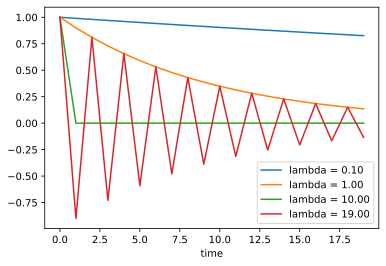

In [11]:
lambdas = [0.1, 1, 10, 19]
eta = 0.1
d2l.set_figsize((6, 4))
for lam in lambdas:
    t = d2l.arange(20).asnumpy()
    d2l.plt.plot(t, (1 - eta * lam) ** t, label=f'lambda = {lam:.2f}')
d2l.plt.xlabel('time')
d2l.plt.legend();